Load Package

In [10]:
include("ALBreIF/ALBreIF.jl")
include("BPGF/BPGF.jl")
using .ALBreIF
using .BPGF

Load the data

In [11]:
using Images
ul = "ORL_Faces/s1/1.pgm"
ig = load(ul)

a, b = size(ig)
R = 5

B = Matrix{Float64}(undef, a*b, 400)
for i = 1 : 40
    for j = 1 : 10
        local url = "ORL_Faces/s"*"$i/"*"$j"*".pgm"
        local img = load(url)
        local q = float64.(channelview(img))
        q = q[:]
        global B[:, (i-1)*10 + j] = q
    end
end

A = BPGF.normalize!(B)
X, Y = BPGF.randinit(A, R^2, 0.2, 1.0)

([0.0 0.0 … 0.008437018121097484 0.003312343294470063; 0.0 0.0 … 0.0 0.0; … ; 0.010701534834511564 0.0 … 0.0 0.0; 0.0 0.0 … 0.01323274485332715 0.0], [0.03338460599710568 0.013778409502433293 … 0.011371284943054146 0.026071634424064443; 0.01578340664353924 0.02801970562363773 … 0.026194765216632207 0.00718454324519644; … ; 0.024883074960946928 0.02457595182941922 … 0.03041292142502584 0.02790623353575392; 0.011732413006374998 0.023612759590985008 … 0.018332788077764197 0.01843134317258685])

Configure parameters

In [12]:
ρ₀ = 0.2 # step size parameter
μ₀ = 0.001 # regularization cofficient
μ = 0.0 # another regularization coefficient
rtime = 300 # runtime
version = false

false

Update

In [13]:
# X₀ = copy(X); # OutOfMemoryError
# Y₀ = copy(Y);
# r₀ = BPGF.solve!(BPGF.BPG{Float64}(runtime=rtime,
#                 verbose=version,
#                 ρ=0.02,
#                 μ₁=μ₀,
#                 μ₂=μ), A, X₀, Y₀)


X₁ = copy(X);
Y₁ = copy(Y);
r₁ = BPGF.solve!(BPGF.BBPG{Float64}(runtime=rtime,
                verbose=version,
                ρ=0.2,
                μ₁=μ₀,
                μ₂=μ), A, X₁, Y₁)

X₂ = copy(X);
Y₂ = copy(Y);
r₂ = ALBreIF.solve!(ALBreIF.ABLBreI{Float64}(runtime=rtime,
                verbose=version,
                ρ=0.5,
                μ₁=μ₀,
                μ₂=μ), A, X₂, Y₂)


Main.ALBreIF.Result{Float64}([0.0 0.0 … 0.004304030239584686 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.005286552984471398 0.0 … 0.0 0.0; 0.0 0.0 … 0.008920691792542273 0.0], [0.014787814153724247 0.01700807764781408 … 0.015055229768245039 0.013208959361737613; 0.015176781535161615 0.01665799813084358 … 0.013498110961563812 0.011693765626471144; … ; 0.01539083428404899 0.015569339370818008 … 0.015261512813053121 0.013377168282435225; 0.016512067118589543 0.01980446589279188 … 0.015410658249346737 0.013625739052970617], 1645, false, [0.0 0.9999998256595155; 0.24900007247924805 0.9731983031325707; … ; 0.0 0.0; 0.0 0.0])

Store experimental results

In [14]:
# stop₀ = r₀.niters
# pic₀ = r₀.objvalue
# rt₀ = pic₀[1:stop₀, 1]
# obj₀ = pic₀[1:stop₀, 2]

stop₁ = r₁.niters
pic₁ = r₁.objvalue
rt₁ = pic₁[1:stop₁, 1]
obj₁ = pic₁[1:stop₁, 2]

stop₂ = r₂.niters
pic₂ = r₂.objvalue
rt₂ = pic₂[1:stop₂, 1]
obj₂ = pic₂[1:stop₂, 2]

1645-element Vector{Float64}:
 0.9999998256595155
 0.9731983031325707
 0.9462322922896176
 0.9223869677580421
 0.8979609214284148
 0.873814990410472
 0.8500518545876162
 0.82743995655056
 0.8049400037948349
 0.784234557104257
 ⋮
 0.08749051175074415
 0.08748868314286255
 0.08748661132795399
 0.08748566763156619
 0.08748504434880498
 0.08748372541065685
 0.08748179419800399
 0.08748132407169203
 0.08747106903346298

Draw Image

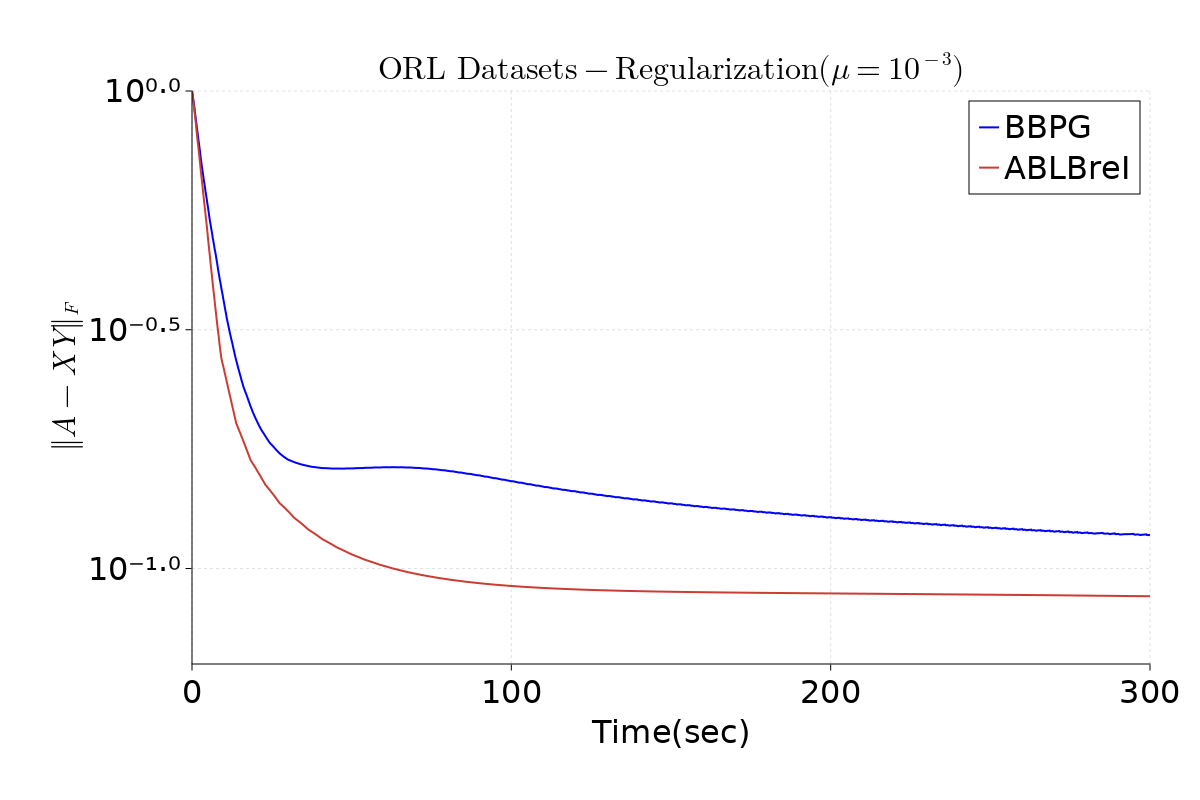

In [22]:
using CairoMakie
using LaTeXStrings
using Colors
using AlgebraOfGraphics
CairoMakie.activate!()
function speed()
        # lines(rt₀, obj₀; color="#4063D8", label="BPG", linewidth=3, linestyle=:dashdot,
                # )
        lines(rt₁, obj₁; color="blue", linewidth=2, linestyle=:solid,
                label="BBPG",
                figure=(; figure_padding=50, resolution=(1200, 800), font="sans",
                        backgroundcolor=:white, fontsize=32),
                axis=(; title = L"\text{ORL Datasets-Regularization}(\mu=10^{-3})",
                        xlabel="Time(sec)", ylabel=L"\Vert A-XY\Vert_F",
                        yscale=log10,
                        xgridstyle=:dash, ygridstyle=:dash,
                        topspinevisible = false, rightspinevisible =false))
        lines!(rt₂, obj₂; color="#CB3C33", linewidth=2, linestyle=:solid,
                label="ABLBreI")
        limits!(0, rtime, 10^(-1.2), 1.0)
        axislegend(merge=true)
        current_figure()
end

with_theme(speed, theme=theme_dark())
speed()

Save Image

In [23]:
save("plot/real_data.png", speed())

CairoMakie.Screen{IMAGE}


In [17]:
function find_closest(value, arr)
    min_diff = abs(arr[1] - value)
    closest_index = 1
    
    for i in 2:length(arr)
        diff = abs(arr[i] - value)
        if diff < min_diff
            min_diff = diff
            closest_index = i
        end
    end
    
    return closest_index
end

find_closest (generic function with 1 method)

In [21]:
print(obj₂[find_closest(15, rt₂)])
print("\n")
print(obj₂[find_closest(30, rt₂)])
print("\n")
print(obj₂[find_closest(60, rt₂)])
print("\n")
print(obj₂[find_closest(300, rt₂)])

0.1933263859275937
0.13210070799090687
0.10129950265373926
0.08748132407169203